# Task 1 LP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def read_file(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            numbers = line.strip().split(' ')
            label = float(numbers[0])
            grayscale = np.array([float(number) for number in numbers[1:]])
            if label == 1.0:
                label = 1.0
                data.append((label, grayscale))
            else:
                label = -1.0
                data.append((label, grayscale))
    return data

In [2]:
train_data = read_file("ZipDigits.train")
# test_data = read_file("ZipDigits.test")

In [4]:
def extract(data):
    intensities = []
    symmetrics = []
    labels = []
    
    for i in range(len(data)):
        labels.append(data[i][0])
        
        mid = int(len(data[i][-1])/2)
        intensity = np.mean(data[i][-1])
        intensities.append(intensity)
        
        left = data[i][-1][:mid]
        right = data[i][-1][mid:]
        diff = np.abs(left-right)
        symmetric = np.mean(diff)
        symmetrics.append(symmetric)
        
    return labels, intensities, symmetrics

In [10]:
train_labels, train_intensities, train_symmetrics = extract(train_data)
# test_labels, test_intensities, test_symmetrics = extract(test_data)

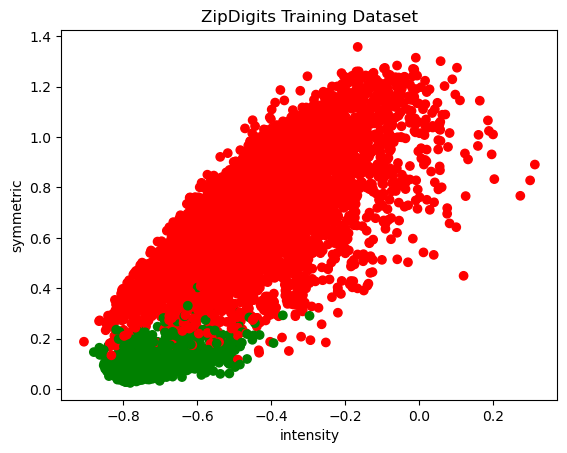

In [6]:
plt.scatter(train_intensities, train_symmetrics, c=ListedColormap(("red", "green"))(train_labels))
plt.title("ZipDigits Training Dataset")
plt.xlabel("intensity")
plt.ylabel("symmetric")
plt.show()

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [92]:
data_X_train = np.column_stack((train_intensities, train_symmetrics))
data_y_train = np.array(train_labels)

X_train, X_test, y_train, y_test = train_test_split(data_X_train, data_y_train, test_size=0.2, random_state=42)

In [93]:
linear_kernal = SVC(kernel='linear', C=1)
linear_kernal.fit(X_train, y_train)
linear_train_predictions = linear_kernal.predict(X_test)
linear_train_accuracy = accuracy_score(y_test, linear_train_predictions)
print("Linear Kernel: ", 1-linear_train_accuracy)

Linear Kernel:  0.008224811514736086


In [94]:
poly_kernal = SVC(kernel='poly', degree=3, C=1)
poly_kernal.fit(X_train, y_train)
poly_train_predictions = poly_kernal.predict(X_test)
poly_train_accuracy = accuracy_score(y_test, poly_train_predictions)
print("Poly Kernel: ", 1-poly_train_accuracy)

Poly Kernel:  0.010281014393420107


In [95]:
rbf_kernal = SVC(kernel='rbf', C=1)
rbf_kernal.fit(X_train, y_train)
rbf_train_predictions = rbf_kernal.predict(X_test)
rbf_train_accuracy = accuracy_score(y_test, rbf_train_predictions)
print("RBF Kernel: ", 1-poly_train_accuracy)

RBF Kernel:  0.010281014393420107


# Task 1 HP

Only based on the result, linear kernel has the highest accuracy compare with the other two, which we can say that the best kernel is the linear kernal. Nevertheless, high accuracy does not mean the model is the most appropriate way to select a model. Even though linear model has the best performance, but the other two kernels also have a good result. The other two models are not way behind the linear kernel, instead, all kernels have around 0.99 accuracy. Therefore, we need more information like overfitting, cross-validation to consider which model is the best fit.

# Task 2 LP 1

In [96]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold, cross_val_score

parameters = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.01, 0.1, 1, 10, 100]}
k_fold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(SVC(), parameters, cv=k_fold, scoring='accuracy')
grid_search.fit(data_X_train, data_y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [97]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f'Mean error: {1-mean_score}, Parameters: {params}')

Mean error: 0.12097007270515259, Parameters: {'C': 0.01, 'kernel': 'linear'}
Mean error: 0.021396450393988076, Parameters: {'C': 0.01, 'kernel': 'poly'}
Mean error: 0.01302976370120279, Parameters: {'C': 0.01, 'kernel': 'rbf'}
Mean error: 0.012206718433713015, Parameters: {'C': 0.1, 'kernel': 'linear'}
Mean error: 0.013578366526859953, Parameters: {'C': 0.1, 'kernel': 'poly'}
Mean error: 0.010835164359902172, Parameters: {'C': 0.1, 'kernel': 'rbf'}
Mean error: 0.011383955224231412, Parameters: {'C': 1, 'kernel': 'linear'}
Mean error: 0.012343892644961385, Parameters: {'C': 1, 'kernel': 'poly'}
Mean error: 0.010560909956741638, Parameters: {'C': 1, 'kernel': 'rbf'}
Mean error: 0.010972620629158714, Parameters: {'C': 10, 'kernel': 'linear'}
Mean error: 0.01206963824180085, Parameters: {'C': 10, 'kernel': 'poly'}
Mean error: 0.010149481342332733, Parameters: {'C': 10, 'kernel': 'rbf'}
Mean error: 0.011109794840406861, Parameters: {'C': 100, 'kernel': 'linear'}
Mean error: 0.01193246403055

# Task 2 LP 2

In [98]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters: ", best_params, "; Mean error: ", 1-best_accuracy)

Best Parameters:  {'C': 100, 'kernel': 'rbf'} ; Mean error:  0.01001240115042068


I will choose the model in kernel RBF and C=100 since it has the best performance (lowest mean accuracy)

# Task 2 HP

In [99]:
cross_validation_error = 1 - results['mean_test_score']
cross_validation_error

array([0.12097007, 0.02139645, 0.01302976, 0.01220672, 0.01357837,
       0.01083516, 0.01138396, 0.01234389, 0.01056091, 0.01097262,
       0.01206964, 0.01014948, 0.01110979, 0.01193246, 0.0100124 ])

In [100]:
kernel = ['linear', 'poly', 'rbf']
C = [0.01, 0.1, 1, 10, 100]
in_sample_error = []
for i in C:
    for j in kernel:
        model = SVC(kernel=j, C=i)
        model.fit(X_train, y_train)
        model_prediction = model.predict(X_test)
        error = 1 - accuracy_score(y_test, model_prediction)
        in_sample_error.append(error)

In [101]:
in_sample_error

[0.1425633995887594,
 0.017820424948594926,
 0.012337217272104128,
 0.010281014393420107,
 0.012337217272104128,
 0.008224811514736086,
 0.008224811514736086,
 0.010281014393420107,
 0.006168608636052064,
 0.006854009595613442,
 0.008910212474297463,
 0.008224811514736086,
 0.006854009595613442,
 0.00959561343385884,
 0.007539410555174819]

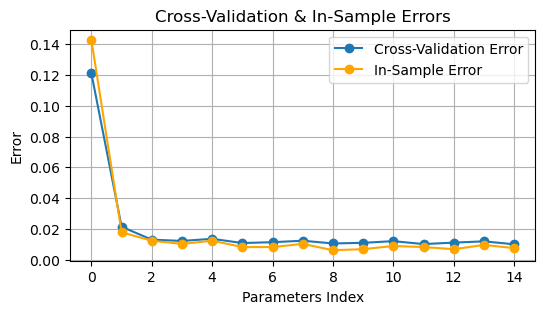

In [102]:
plt.figure(figsize=(6, 3))

plt.plot(cross_validation_error, marker='o', label='Cross-Validation Error')
plt.plot(in_sample_error, marker='o', color='orange', label='In-Sample Error')

plt.title('Cross-Validation & In-Sample Errors')
plt.xlabel('Parameters Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

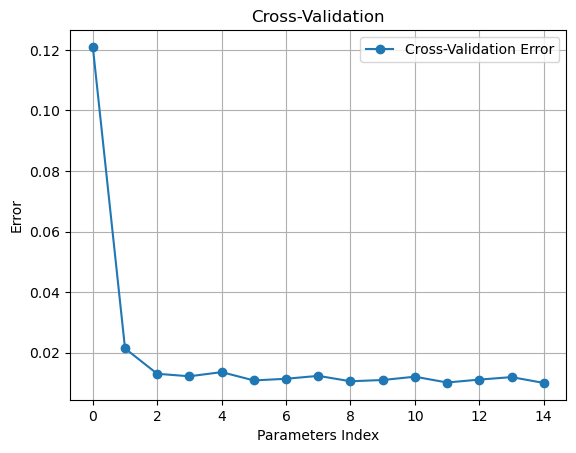

In [103]:
plt.plot(cross_validation_error, marker='o', label='Cross-Validation Error')
plt.title('Cross-Validation')
plt.xlabel('Parameters Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

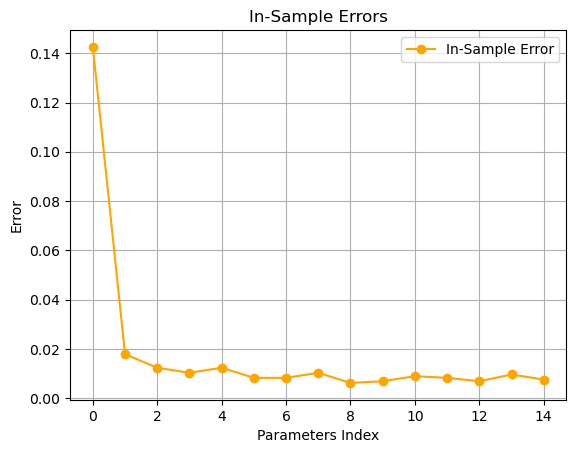

In [104]:
plt.plot(in_sample_error, marker='o', color='orange', label='In-Sample Error')
plt.title('In-Sample Errors')
plt.xlabel('Parameters Index')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

The in-sample error always product bettern result than cross-validation. However, the best model product by those two errors are different. In sample error shows minimun in index 8 (1, RBF), which has error on about 0.006. However, in the cross-validation, the minimum error is in index 14 (100, RBF), which has error on about 0.01. If considering which kernel is better, we may say the RBF kernel is producing a better result than the others

# Task 3 LP 1

In [105]:
train_data_model = SVC(**best_params)
train_data_model.fit(data_X_train, data_y_train);
train_prediction = train_data_model.predict(data_X_train)
final_in_sample_error = 1 - accuracy_score(data_y_train, train_prediction)
print("Train Dataset In Sample Error: ", final_in_sample_error)

Train Dataset In Sample Error:  0.010012343985735805


# Task 3 LP 2

In [106]:
test_data = read_file("ZipDigits.test")
test_labels, test_intensities, test_symmetrics = extract(test_data)
X_test = np.column_stack((test_intensities, test_symmetrics))
y_test = np.array(test_labels)
test_prediction = train_data_model.predict(X_test)
test_in_sample_error = 1 - accuracy_score(y_test, test_prediction)
print("Test Dataset In Sample Error: ", test_in_sample_error)

Test Dataset In Sample Error:  0.012954658694569021
